<a href="https://colab.research.google.com/github/prithiba-A/Data-Science-Project-Series/blob/main/Nexus_Phase2_Project1_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Project: Sentiment Analysis**

In [38]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [39]:
# Step 1: Load the Dataset
data = pd.read_csv('/content/test.csv', encoding='ISO-8859-1')
data

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# Step 2: Data Exploration
print(data.head(5))

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

In [41]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB
None


In [42]:
print(data.describe())

       Population -2020  Land Area (Km²)  Density (P/Km²)
count      3.534000e+03     3.534000e+03      3534.000000
mean       3.941891e+07     6.722499e+05       348.894171
std        1.468757e+08     1.839134e+06      1967.012367
min        8.010000e+02     0.000000e+00         2.000000
25%        1.968001e+06     2.281000e+04        35.000000
50%        8.696453e+06     1.127600e+05        87.000000
75%        2.843594e+07     5.279700e+05       214.000000
max        1.439324e+09     1.637687e+07     26337.000000


In [43]:
print(data['sentiment'].value_counts())

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


In [44]:
# Step 3: Data Preprocessing
def preprocess_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = text.lower()  # Lowercase
        text = re.sub(r'\d+', '', text)  # Remove numbers
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    else:
        text = ''  # Handle non-string values, e.g., NaN
    return text

data['clean_text'] = data['text'].apply(preprocess_text)


In [45]:
# Step 4: Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean_text'])

In [46]:
# Encoding the target variable (sentiment)
le = LabelEncoder()
y = le.fit_transform(data['sentiment'])

In [47]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Step 6: Model Selection and Training (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [49]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.39771547248182765
[[ 46 174   5   1]
 [  5 237  23   3]
 [  1 107 100   3]
 [  0 258   0   0]]
              precision    recall  f1-score   support

           0       0.88      0.20      0.33       226
           1       0.31      0.88      0.45       268
           2       0.78      0.47      0.59       211
           3       0.00      0.00      0.00       258

    accuracy                           0.40       963
   macro avg       0.49      0.39      0.34       963
weighted avg       0.46      0.40      0.33       963



In [50]:
# Step 8: Hyperparameter Tuning (Optional)
pipeline = Pipeline([('model', MultinomialNB())])

# Define parameter grid
param_grid = {
    'model__alpha': [0.1, 0.5, 1.0],
}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', MultinomialNB())]),
             param_grid={'model__alpha': [0.1, 0.5, 1.0]}, verbose=1)

In [51]:
# Step 9: Cross-Validation and Final Model Evaluation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.411214953271028
[[ 67 145  12   2]
 [ 16 213  34   5]
 [  2  89 116   4]
 [  0 258   0   0]]
              precision    recall  f1-score   support

           0       0.79      0.30      0.43       226
           1       0.30      0.79      0.44       268
           2       0.72      0.55      0.62       211
           3       0.00      0.00      0.00       258

    accuracy                           0.41       963
   macro avg       0.45      0.41      0.37       963
weighted avg       0.43      0.41      0.36       963



In [54]:
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

# Step 10: Model Interpretability with LIME

# Create a pipeline that includes both the TF-IDF vectorizer and the trained model
c = make_pipeline(tfidf, model)

# Initialize LIME explainer for text
explainer = lime.lime_text.LimeTextExplainer(class_names=le.classes_)

# Choose a random instance from the test set for interpretation
idx = 42  # Index of the text instance you want to interpret
sample_text = data['clean_text'].iloc[idx]
true_label = le.inverse_transform([y_test[idx]])[0]

# Explain the model's prediction for the selected text
exp = explainer.explain_instance(sample_text, c.predict_proba, num_features=10)

# Show the explanation in the notebook
exp.show_in_notebook(text=True)

# Print the true sentiment and the predicted sentiment
predicted_label = le.inverse_transform([model.predict(tfidf.transform([sample_text]))])[0]
print(f"True Sentiment: {true_label}")
print(f"Predicted Sentiment: {predicted_label}")


True Sentiment: neutral
Predicted Sentiment: neutral


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


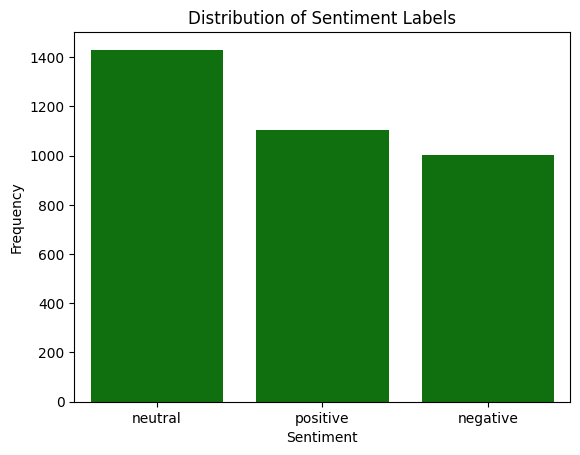

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
sns.countplot(x='sentiment', data=data, color='Green')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

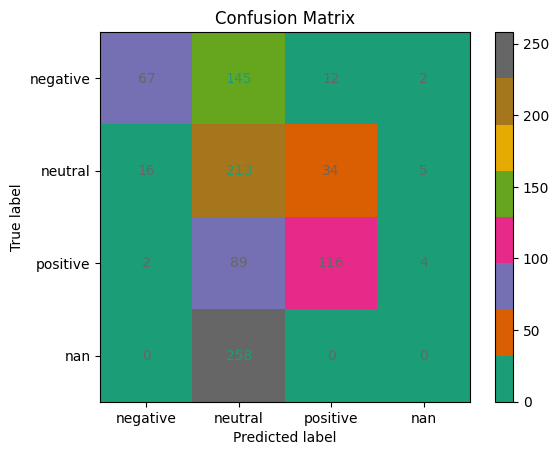

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot the confusion matrix for the best model
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, display_labels=le.classes_, cmap='Dark2')
plt.title('Confusion Matrix')
plt.show()

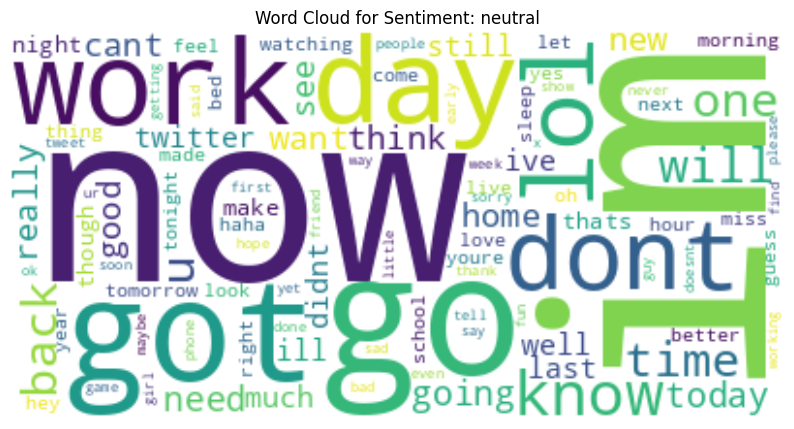

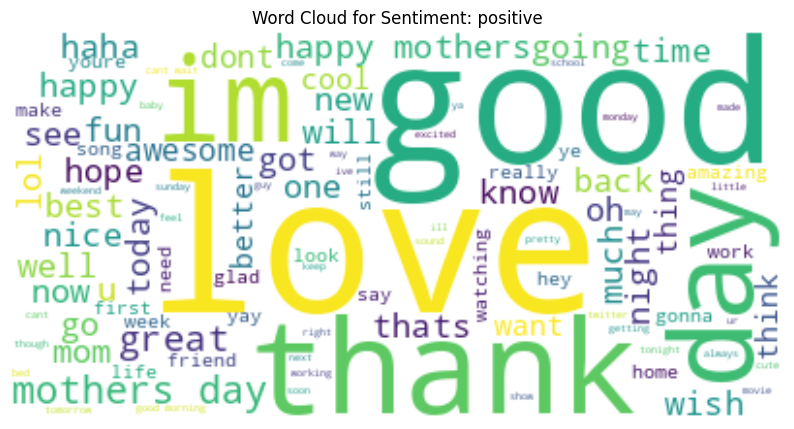

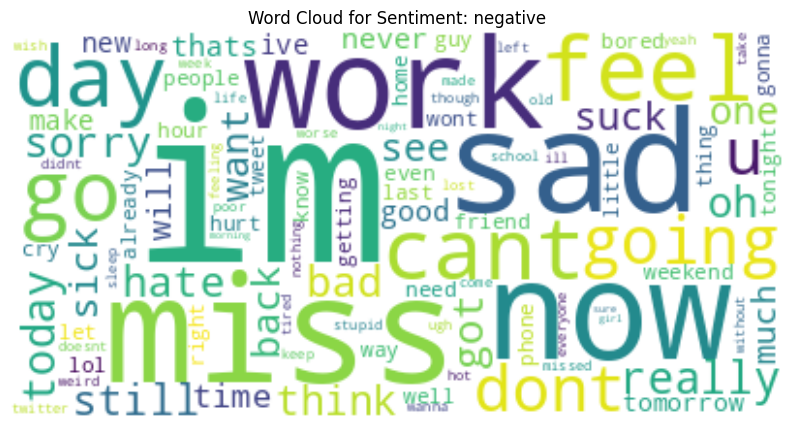

No words available to generate a word cloud for sentiment: nan


In [63]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for sentiment in data['sentiment'].unique():
    subset = data[data['sentiment'] == sentiment]
    text = ' '.join(subset['clean_text'])

    if text.strip():  # Check if text is not empty
        wordcloud = WordCloud(max_words=100, background_color='white').generate(text)

        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Sentiment: {sentiment}")
        plt.show()
    else:
        print(f"No words available to generate a word cloud for sentiment: {sentiment}")